<a href="https://colab.research.google.com/github/abinarain/MatrixDecompositionForDataScience/blob/main/MDAProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Author: Abhishek N. Singh
#Student Number: 322079
#Assignment Project 1
#Course: Matrix Decomposition for Data Science
#Date: 2nd February 2021
#Description: We do analysis of SVD and PCA


In [ ]:
import numpy as np
import scipy
from numpy.linalg import svd
from sklearn.cluster import KMeans
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from networkx.algorithms import bipartite
## Task 1

#########

## Load the data. We could use pandas to get tables, but as we're just doing
## matrix stuff numpy arrays are fine. 
data = np.genfromtxt('worldclim.csv', delimiter=',', skip_header=1)
coord = np.genfromtxt('coordinates.csv', delimiter=',', skip_header=1)
lat = coord[:,0]
lon = coord[:,1]

**Note** the installation of packages codes are below

In [ ]:
!pip install --no-binary shapely shapely --force

     |████████████████████████████████| 389kB 11.6MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.1
    Uninstalling Shapely-1.7.1:
      Successfully uninstalled Shapely-1.7.1
    Running setup.py install for shapely ... done


In [ ]:
data

array([[286., 286., 291., ...,   6.,   4.,   7.],
       [301., 300., 307., ...,   5.,   6.,  31.],
       [305., 306., 312., ...,  10.,   8.,  77.],
       ...,
       [293., 291., 291., ..., 163., 171., 230.],
       [271., 269., 268., ..., 168., 178., 231.],
       [275., 273., 271., ..., 153., 165., 214.]])

In [ ]:
coord

array([[-80.719  ,  -1.06683],
       [-80.2698 ,  -1.06683],
       [-79.8205 ,  -1.06683],
       ...,
       [133.1723 ,  -1.51599],
       [133.6217 ,  -1.51599],
       [134.071  ,  -1.51599]])

In [ ]:
lat

array([-80.719 , -80.2698, -79.8205, ..., 133.1723, 133.6217, 134.071 ])

In [ ]:
lon

array([-1.06683, -1.06683, -1.06683, ..., -1.51599, -1.51599, -1.51599])

In [ ]:
#!apt-get -qq install python-cartopy python3-cartopy
!apt-get -V -y -qq install python-cartopy python3-cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [ ]:
!pip uninstall shapely -y

Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1


In [ ]:
!pip install shapely --no-binary shapely

**Task 1**: Normalization
Download the data and utility files (assignment1.zip) from Moodle. That package contains files
assignment1.{R,m,py}, data files worldclim.{csv,txt} and coordinates.{csv,txt}, meta data file
worldclim_attributes.txt, and some helper files (utils.R and matching.m). You can fill your code to
the appropriate assignment1 file (referred as the file henceforth) and return it as a part of your solution.
Follow the steps in the file to load the worldclim data. This data contains information about the
bioclimatic conditions (minimum, maximum, and average temperature in tenths of degrees Celcius and
average precipitation in millimetres) per months in the world. Spend some time exploring the data (you
do not need to report these explorations, though). Compute the SVD of the data, and plot the first two left
singular vectors to a map. This is also explained in the provided file. Can you interpret the results?
Play around with different color schemes and markers. Can you make the results more interpretable that
way? Does the color scheme affect the interpretation?
Normalize the data to z-scores. Implement the normalization yourself (i.e. do not use any build-in
zscore functions). Given the type of data we have, do you think this normalization is sensible?
Compute the SVD of the normalized data, and plot again the first two left singular vectors. Have they
changed? Has your interpretation changed? Why?

In [ ]:
## Compute SVD of data
U, S, V = svd(data, full_matrices=False, compute_uv=True)

In [ ]:
U.shape, S.shape, V.shape

((54013, 48), (48,), (48, 48))

In [ ]:
U

array([[-5.39078497e-03,  1.23899061e-03, -3.65828920e-03, ...,
         5.69607286e-03, -3.65683391e-03, -9.68112002e-03],
       [-5.73893047e-03,  9.95635140e-04, -4.07822488e-04, ...,
         1.37313428e-03, -8.13191765e-03,  4.81455487e-03],
       [-6.03608763e-03,  9.70257056e-04,  2.98186210e-03, ...,
        -6.42922438e-03, -4.84943995e-03,  1.10481737e-02],
       ...,
       [-6.08405337e-03,  5.79150813e-04,  8.99075891e-03, ...,
        -6.41451406e-04, -4.07681598e-05, -2.30360217e-04],
       [-5.53991534e-03,  4.21860898e-04,  9.38318683e-03, ...,
         4.44470598e-03, -8.87045919e-04,  6.47914293e-03],
       [-5.56470181e-03,  4.91190174e-04,  8.00055178e-03, ...,
        -3.13223687e-03,  6.04780681e-03,  2.09872510e-03]])

In [ ]:
S

array([2.67803546e+05, 1.24366268e+05, 4.98328790e+04, 3.85745981e+04,
       2.32450301e+04, 1.32864021e+04, 1.30988406e+04, 1.10092444e+04,
       8.00670924e+03, 6.42060267e+03, 6.04135143e+03, 5.32999552e+03,
       4.84777102e+03, 4.14447007e+03, 3.38076600e+03, 3.31148113e+03,
       2.94891884e+03, 2.65577654e+03, 2.45846784e+03, 2.27274062e+03,
       2.21426164e+03, 1.94766389e+03, 1.81771752e+03, 1.73230364e+03,
       1.50143411e+03, 1.38835866e+03, 1.21027059e+03, 1.07809158e+03,
       9.73323838e+02, 9.30100118e+02, 7.96881852e+02, 6.84914824e+02,
       5.94188999e+02, 4.94386242e+02, 4.57844757e+02, 4.40322965e+02,
       5.86484748e+01, 5.49306258e+01, 5.45303095e+01, 5.43953295e+01,
       5.42927452e+01, 5.41047165e+01, 5.38335273e+01, 5.37831677e+01,
       5.36308378e+01, 5.33985926e+01, 5.32721482e+01, 5.29128561e+01])

In [ ]:
V

array([[-1.84933973e-01, -1.92089630e-01, -2.01295072e-01, ...,
        -5.32639591e-02, -5.08779231e-02, -5.51761530e-02],
       [ 1.89629813e-01,  1.56040140e-01,  6.99456606e-02, ...,
        -3.80278693e-02, -2.74392249e-02, -1.93274555e-02],
       [ 2.19301303e-03, -1.76882467e-02, -4.26293867e-02, ...,
         2.89169796e-01,  2.60657709e-01,  2.55968894e-01],
       ...,
       [ 2.25964870e-01, -2.20420857e-02, -1.84245942e-01, ...,
         1.24067750e-04, -8.29692645e-05,  1.04013682e-04],
       [ 2.40501975e-01,  4.44762624e-03,  6.71977202e-02, ...,
         2.96804589e-05,  1.01165387e-05, -6.36227670e-06],
       [ 1.50379915e-01, -4.50621650e-02,  3.94192171e-02, ...,
         2.56268374e-05, -4.58650986e-05, -2.66490993e-05]])

In [ ]:
#Lets construct the SIGMA matrix from S
SigmaM = np.diag(S)

In [ ]:
SigmaM

array([[2.67803546e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.24366268e+05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.98328790e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.33985926e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.32721482e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.29128561e+01]])

In [ ]:
U[:,1] #Second left singular vector

array([0.00123899, 0.00099564, 0.00097026, ..., 0.00057915, 0.00042186,
       0.00049119])

In [ ]:
U[:,0] #First left singular vector

array([-0.00539078, -0.00573893, -0.00603609, ..., -0.00608405,
       -0.00553992, -0.0055647 ])

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


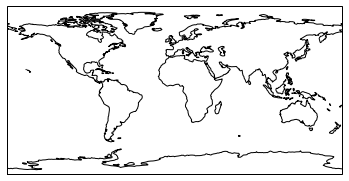

In [ ]:
## Plot the base map; nothing is shown yet
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
#ax.plot(lon, lat, color='red', transform=ccrs.PlateCarree())
## If you want to see how it looks, write
plt.show()


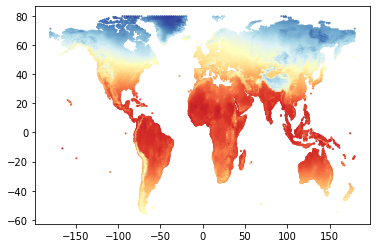

In [ ]:
## Plot the first column of U so that the color indicates the value
##This is the first left singular vector
plt.scatter(lat, lon, s=1, c = U[:,0], cmap='RdYlBu')
plt.show()


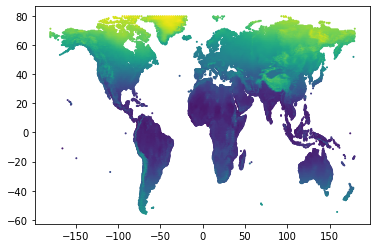

In [ ]:
## Plot the first column of U so that the color indicates the value
##This is the first left singular vector
plt.scatter(lat, lon, s=1, c = U[:,0])
plt.show()

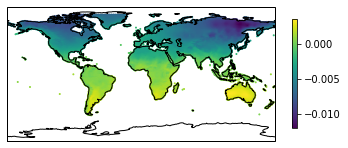

In [ ]:
## Plot the second column
#This is the 2nd singular vector
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(lat, lon, s=1, c = U[:,1])
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
#Comments
#We know that the first column of U is more important than 2nd column of U and so on and so forth, in describing the data matrix. 
# In other words, the left singular vector 1 is more important than the left singular vector 2, and the importance is tapped
# in the S matrix 2.67803546e+05 being importance factor for 1st left singular vector and 1.24366268e+05 being the 
# importance factor for 2nd left singular vector. For instance the first singular vector could be tapping in the precipitation distribution
# as we can see by the similarity in the color in the geographies with similar longitudes. The second left singular vector can
# perhaps be tapping the temperature as per latitude. 

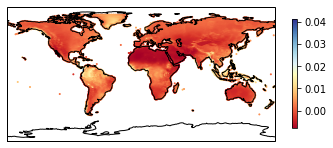

In [ ]:
#Lets try for the 3rd left singular vector. We see a totally different color, which perhaps represents darker color for lower precipitation
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(lat, lon, s=1, c = U[:,2], cmap='RdYlBu')
plt.colorbar(shrink=0.5)
plt.show()

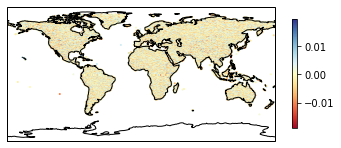

In [ ]:
#Lets try for the 47th left singular vector. We see a almost no color, representing that the column is insignificant
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(lat, lon, s=1, c = U[:,47], cmap='RdYlBu')
plt.colorbar(shrink=0.5)
plt.show()

In [ ]:
#Comment
#Thus the color scheme does not seem to be impacting much of interpretation. But the vector chosen does matter.

In [ ]:
#Normalize the matrix data
xmax, xmin = data.max(), data.min()
x = (data - xmin)/(xmax - xmin)
print("After normalization:")
print(x)






After normalization:
[[0.36764706 0.36764706 0.36987522 ... 0.24286988 0.24197861 0.24331551]
 [0.37433155 0.37388592 0.37700535 ... 0.24242424 0.24286988 0.2540107 ]
 [0.37611408 0.37655971 0.37923351 ... 0.24465241 0.24376114 0.2745098 ]
 ...
 [0.37076649 0.36987522 0.36987522 ... 0.31283422 0.31639929 0.34269162]
 [0.36096257 0.3600713  0.35962567 ... 0.31506239 0.31951872 0.34313725]
 [0.3627451  0.36185383 0.36096257 ... 0.3083779  0.31372549 0.3355615 ]]


In [ ]:
## Compute SVD of normalized data
Un, Sn, Vn = svd(data, full_matrices=False, compute_uv=True)

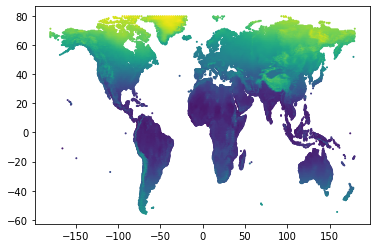

In [ ]:
## Plot the first column of U so that the color indicates the value
##This is the first left singular vector
plt.scatter(lat, lon, s=1, c = Un[:,0])
plt.show()

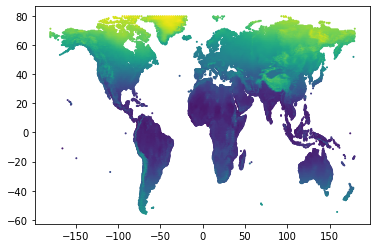

In [ ]:
## Plot the first column of U so that the color indicates the value
##This is the first left singular vector
plt.scatter(lat, lon, s=1, c = U[:,0])
plt.show()

In [ ]:
#We can see that the normalized data does lead to some amount of differences in the color scheme. Thus, normalization should be preferred to avoid biases.



In [ ]:
#Z-score normalization by centering :
#The z-scores are attributes whose values are transformed by
#centering them to 0
# Remove the mean of the attribute’s values from each value
# normalizing the magnitudes
# Divide every value with the standard deviation of the attribute

In [ ]:
ZnormData = (data - np.mean(data))/(np.std(data))
print("After normalization:")
print(ZnormData)

After normalization:
[[ 1.14237234  1.14237234  1.17561139 ... -0.71901444 -0.73231006
  -0.71236663]
 [ 1.24208949  1.23544168  1.28197635 ... -0.72566225 -0.71901444
  -0.55281919]
 [ 1.26868073  1.27532854  1.3152154  ... -0.6924232  -0.70571882
  -0.24701993]
 ...
 [ 1.18890701  1.17561139  1.17561139 ...  0.32469172  0.3778742
   0.77009499]
 [ 1.04265519  1.02935957  1.02271176 ...  0.35793077  0.42440887
   0.7767428 ]
 [ 1.06924643  1.05595081  1.04265519 ...  0.25821362  0.33798734
   0.66373003]]


In [ ]:
## Compute SVD of Z-normalized data
Uzn, Szn, Vzn = svd(ZnormData, full_matrices=False, compute_uv=True)

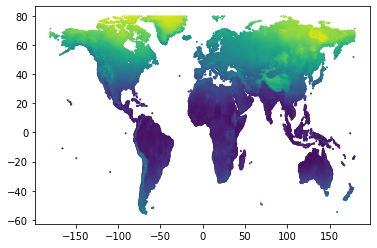

In [ ]:
## Plot the first column of U so that the color indicates the value
##This is the first left singular vector
plt.scatter(lat, lon, s=1, c = Uzn[:,0])
plt.show()

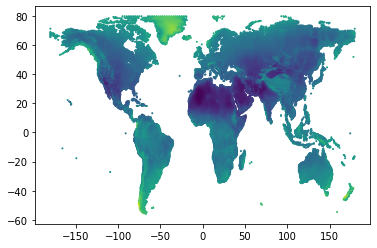

In [ ]:
plt.scatter(lat, lon, s=1, c = Uzn[:,1])
plt.show()

In [ ]:
#The z-score normalization does lead to a different plot.  z-scores assume that all attributes are equally important
# attribute values are approximately normally distributed
#Main problem in task 1 was to install cartopy module. 

In [ ]:
#Task 2
## If S is an array that contains the singular values, you can plot them by
#plt.plot(S)
#plt.show()

**Task 2**: Selecting the rank
In this task, we use the normalized worldclim data that you did in the previous task. Compute the SVD
of the data. Implement the following rank selection methods and use them to decide what would be a good
rank for the truncated SVD:
• Guttman–Kaiser criterion
• 90% of explained Frobenius norm
• Scree test
• Entropy-based method
• Random flipping of signs
Report the rank each method suggests (and when subjective evaluation is needed to decide the rank,
explain why you choose that rank). Discuss the results: are they same or different? Why? Do you think
some methods work better than others? Why? What rank would you choose? Why?


In [ ]:
#Guttman–Kaiser criterion:
#Select k so that for all i > k, σi < 1
#Motivation: all components with singular value less than unit are
#uninteresting

In [ ]:
# select enough singular values such
#that the sum of their squares is 90% of the total sum of the squared
#singular values
# The exact percentage can be different (80%, 95%)
# Motivation: The resulting matrix “explains” 90% of the Frobenius
#norm of the matrix (a.k.a. energy)
Szn

array([1.31283261e+03, 8.01571371e+02, 3.13369040e+02, 2.41704203e+02,
       1.91286391e+02, 8.95611711e+01, 8.68602569e+01, 7.18168331e+01,
       5.29865254e+01, 4.25812557e+01, 4.02927978e+01, 3.53760294e+01,
       3.26586274e+01, 2.75585412e+01, 2.24424878e+01, 2.20132578e+01,
       1.96105960e+01, 1.76978803e+01, 1.63053680e+01, 1.52561421e+01,
       1.45563975e+01, 1.29945401e+01, 1.21170996e+01, 1.15149704e+01,
       9.96642297e+00, 9.23919126e+00, 8.08562679e+00, 7.21007314e+00,
       6.43621372e+00, 6.18002689e+00, 5.29765033e+00, 4.55146176e+00,
       3.94620570e+00, 3.28658822e+00, 3.04426817e+00, 2.91562008e+00,
       4.01754676e-01, 3.65168889e-01, 3.62512549e-01, 3.61657969e-01,
       3.60961269e-01, 3.59676788e-01, 3.57921287e-01, 3.57538319e-01,
       3.56558752e-01, 3.55013075e-01, 3.54138281e-01, 3.51756644e-01])

In [ ]:
#Lets construct the SIGMA matrix from Szn
SigmaMz = np.diag(Szn)

In [ ]:
SigmaMz

array([[1.31283261e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.01571371e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.13369040e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.55013075e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.54138281e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.51756644e-01]])

In [ ]:
#SigmaMz.dtype

dtype('float64')

In [ ]:
diagnoalElementsSigma = np.diag(SigmaMz)

In [ ]:
for k in range(0,len(diagnoalElementsSigma)):
  if diagnoalElementsSigma[k] < 1:
    print(k)
    break


36


In [ ]:
#Thus we are able to get the index which corresponds to RANK of the SVD truncated matrix which is 36+1 = 37.
#Since we start from index 0, thus the 37th column is the relevant rank column.

In [ ]:
# This method is based on arbitrary thresholds and do not consider the “shape” of the data


In [ ]:
ForbeniusNormSquared = np.trace(SigmaMz.dot(SigmaMz.T))

In [ ]:
ForbeniusNormSquared

2592623.9999999995

In [ ]:
sum = 0
NinetyPcForbenNoSq = 0.90 * ForbeniusNormSquared
for k in range(0,len(diagnoalElementsSigma)):
  sum = sum + np.square(diagnoalElementsSigma[k])
  if sum >= NinetyPcForbenNoSq:
    print(k)
    break

1


In [ ]:
print(sum)

2366046.116820601


In [ ]:
#Thus by this method the rank is equal to 1+1 = 2. i.e. we choose 2 columns.
#More details of theory at http://resources.mpi-inf.mpg.de/d5/teaching/ss13/dmm/slides/03-svd-handout.pdf

In [ ]:
#Cattell’s Scree test

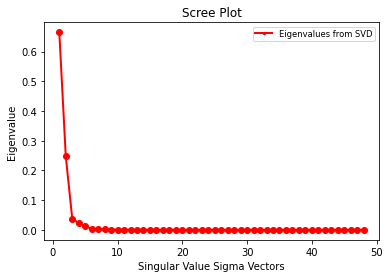

In [ ]:
#Code taken from: https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python 
eigvals = Szn**2 / np.sum(Szn**2)  #

num_vars = Uzn.shape[1]
num_obs = Uzn.shape[0]

#fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Singular Value Sigma Vectors')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'), markerscale=0.4)
plt.show()

In [ ]:
# Sree plots are subjective. We can see that there is a sharp dip at 6th data point after which the curve is mostly flat.
# Thus, the rank by this method can be chosen to be 6

In [ ]:
#Entropy method

In [ ]:
len(diagnoalElementsSigma)

48

In [ ]:
# http://resources.mpi-inf.mpg.de/d5/teaching/ss13/dmm/slides/03-svd-handout.pdf Here I get the details of Entropy 

In [ ]:
EntropyMultiplier = -(1 / np.log2(len(diagnoalElementsSigma)))
Entropy = 0
for k in range(0,len(diagnoalElementsSigma)):
  fk = np.square(diagnoalElementsSigma[k]) / ForbeniusNormSquared #Relative contribution of each singular value to overall Forbenius norm
  Entropy = Entropy + ( fk * np.log2(fk) )
Entropy = EntropyMultiplier * Entropy
print(Entropy)

fSum = 0
for k in range(0,len(diagnoalElementsSigma)):
  fk = np.square(diagnoalElementsSigma[k]) / ForbeniusNormSquared
  fSum = fSum + fk
  if fSum >= Entropy:
    print(k)
    break



0.25114621616037697
0


In [ ]:
#As the entropy is close to 0 than to 1, almost all the mass lies towards the initial singular values
#This is also confirmed by the fact that the smallest k for which sum of frequency exceeds entropy is greater than
#entropy is 0. Thus the rank by Entropy method will be 0 +1, which mean 1st column only.  

In [ ]:
#Random flipping of signs
# Source: http://resources.mpi-inf.mpg.de/d5/teaching/ss13/dmm/slides/03-svd-handout.pdf

In [ ]:
#Multiply every element of the data A randomly with either 1 or −1 to
#get A˜
#I The Frobenius norm doesn’t change (kAkF = kA˜kF )
#I The spectral norm does change (kAk2 6= kA˜k2)
#F How much this changes depends on how much “structure” A has

#The residual matrix contains the last m − k columns of U,
#min{n, m} − k singular values, and last n − k rows of V

#T
#I If A−k is the residual matrix of A after rank-k truncated SVD and A˜ −k
#is that for the matrix with randomly flipped signs, we select rank k to
#be such that (kA−k k2 − kA˜ −k k2)/kA−k kF is small

In [ ]:
#Here k can be as small as 2 which can be the rank

In [ ]:
#I would go with the rank of the Scree plot i.e. 6. This is because we can look at the shape of data and can see where
# exactly does it matter to take relevant singular vectors.

In [ ]:
#Task 3

**Task 3**: Clustering and PCA
For this task, our goal is to cluster the rows of the data into five clusters and visualize the result. One
way to do this is to first cluster the data into five clusters using the k-means algorithm, and then plot the
data points into the map in such a way that the color of the marker identifies the cluster (the provided file
explains the process).
Look at the resulting clustering and explain what the clusters may represent (remember, the data contains
temperature and rainfall information).
For another visualization of the results, plot the data so that the x-axis position comes from the first left
singular vector, the y-axis position comes from the second left singular vector, and the color of the marker is
defined by the clustering.
Are the clusters well-separated from each other in the plot or are they mixed? Do some of the clusters
look like outliers?
Now, apply the Karhunen–Loève transformation (i.e. PCA) to project the data into a 2-dimensional
subspace. Repeat the clustering and visualization steps with this new data. Did the results change? Why do
you think the results changed or did not change?


In [ ]:
## We again use the normalized data. If that is contained in matrix 'D'
## we can compute the k-means to 5 clusters with 10 re-starts as
clustering = KMeans(n_clusters=5, n_init=10).fit(ZnormData)
idx = clustering.labels_

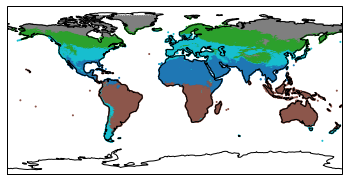

In [ ]:
## The plotting 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(lat, lon, s=1, c = idx, cmap='tab10')
plt.show()

In [ ]:
#Clearly, the data may contain representation of area havig similar temperatures. Rainfall seems to have little
#effect here, given that the Indian subcontinent has been given the same cluster as that of middle east, whereas we 
#know for sure by ground reality that the precipitation levels are different for these two regions. 

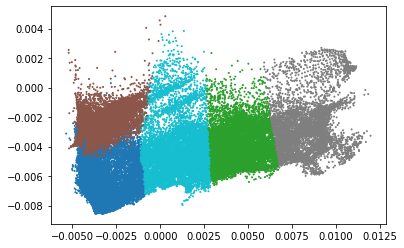

In [ ]:
## The plotting of the data into 5 clusters with the x-axis and y-axis as 
#1st left singular vector and 2nd left singular vector
#
plt.scatter(Uzn[:,0], Uzn[:,1], s=1, c = idx, cmap='tab10')
plt.show()

In [ ]:
#We note that the clusters are not well separated. The borders of each of of them 
#touch with other clusters. Clearly, K-Means does not looks to be the best 
#clustering method here. There is no clear-cut outlier though. 

In [ ]:
from sklearn.decomposition import PCA # This is for Karhunen–Loève transformation
pca = PCA(n_components=2)


In [ ]:
principalComponents = pca.fit_transform(ZnormData)

In [ ]:
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalComponents[:,0]

array([-4.8745432 , -5.30186241, -5.73831486, ..., -5.65954287,
       -4.73266626, -4.80537418])

In [ ]:
#Plotting Data by Principal components - 1st and 2nd

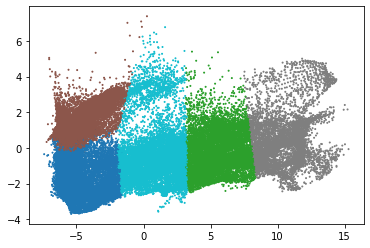

In [ ]:
plt.scatter(principalComponents[:,0], principalComponents[:,1], s=1, c = idx, cmap='tab10')
plt.show()

In [ ]:
#There seems to be LITTLE to almost no difference among the plots. This says that, taking the 
# left singular vectors in SVD decomposition corresponds to that of conducting PCA.

#SVD is one way to get PCA, and this is illustrated by the above example. 

In [ ]:

def matching(idxA, idxB):
    labelsA = np.unique(idxA)
    m = len(labelsA)
    labelsB = np.unique(idxB)
    n = len(labelsB)
    W = np.zeros((m, n))
    for j in range(n):
        for i in range(m):
            W[i, j] = -sum(idxA[idxB == labelsB[j]] == labelsA[i])
    G = bipartite.from_biadjacency_matrix(scipy.sparse.coo_matrix(W))
    top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
    match = bipartite.minimum_weight_full_matching(G, top_nodes)
    new_labels = dict()
    for i in range(n):
        new_labels[labelsB[i]] = labelsA[match[i+n]]
    matched = np.array([new_labels[idxB[i]] for i in range(len(idxB))])
    return matched

In [ ]:
#Tasks finished. Note, some libraries such as NetworkX were not used at all.